In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part A

#### Step 1: Read Hitters Dataset into a pandas dataframe.

In [16]:
df = pd.read_csv('Hitters.csv')

#### Step 2: Pre-process the data.

In [17]:
# drop empty rows
df.dropna(inplace=True)
print (df.head(10))


               Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1         -Alan Ashby    315    81      7    24   38     39     14    3449   
2        -Alvin Davis    479   130     18    66   72     76      3    1624   
3       -Andre Dawson    496   141     20    65   78     37     11    5628   
4   -Andres Galarraga    321    87     10    39   42     30      2     396   
5    -Alfredo Griffin    594   169      4    74   51     35     11    4408   
6          -Al Newman    185    37      1    23    8     21      2     214   
7    -Argenis Salazar    298    73      0    24   24      7      3     509   
8      -Andres Thomas    323    81      6    26   32      8      2     341   
9     -Andre Thornton    401    92     17    49   66     65     13    5206   
10     -Alan Trammell    574   159     21   107   75     59     10    4631   

    CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
1     835  ...    321   414     375       N        W     632

There are 21 different features in this data frame and there are 321 different samples, so the data is stored in a 321 by 21 dataframe.

In [18]:
# feature data frame
X = df[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League','Division','PutOuts','Assists','Errors','Salary']]
# lable data frame
y = df[['NewLeague']]

# seperate all non-numerical columns
X_cat = X.select_dtypes(exclude=['int64', 'float64'])
# seperate all numerical columns                                                                                                         
X_dog = X.select_dtypes(include=['int64', 'float64'])                                                                                                         

# Convert all the League and Division data to categorical/bool                                                                                                                                                             
X_cat = pd.get_dummies(X_cat)
# Merge non-numerical and numerical data back together                                                                                                                                 
X = pd.concat([X_cat, X_dog], axis=1)   

# Transform ‘A’ in label to 0 and‘N’ to 1
NewLeague2number_dict = {
    'A':0,
    'N':1
}

y=y.replace({"NewLeague": NewLeague2number_dict})
#print(y.head(10))

/tmp/ipykernel_73779/3643112482.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace({"NewLeague": NewLeague2number_dict})


#### Step 3: Split the data into train and test sets.

In [19]:
# Convert dataframes to numpy matrices
Xnp = np.matrix(X.values,dtype=np.float64)
ynp = np.matrix(y.values,dtype=np.float64)

# print(Xnp.shape)
# print(ynp.shape)

# Get the information to split the matrices 
split_index = int((.7) * len(X))
split_list = np.arange(len(X))

# Split the matrices into 4 test train sets
X_train, X_test = Xnp[split_list[:split_index]], Xnp[split_list[split_index:]]
y_train, y_test = ynp[split_list[:split_index]], ynp[split_list[split_index:]]

# Normalize features
X_train = (X_train - X_train.mean()) / X_train.std()

# Normalize Test features
X_test = (X_test - X_test.mean()) / X_test.std()



#### Step 4: Train a logistic regression model. 

In [20]:
# get size of dimensionality
sample_size, feature_size = X_train.shape
epoch_weight = 1 / sample_size

# Initialize weights
weights_arr = np.zeros((feature_size,1),dtype=np.float128)
bias_term = 0

# Hyper params
learning_rate = .01
iterations = 1000
final = 0
for epoch in range(0, iterations):
    # make prediction
    dot_prod_pred = np.array(np.dot(X_train, weights_arr),dtype=np.float128)
    pred_hat = bias_term + dot_prod_pred
    #normalized_pred_hat = pred_hat - np.max(pred_hat)
    # Sigmoid function
    pred = 1 / (1 + np.exp(-pred_hat))

    # calculate how much off
    total_diff = np.sum(pred - y_train)
    element_wise_diff = (pred - y_train)
    dot_prod_diff = np.array(np.dot(X_train.T, element_wise_diff),dtype=np.float128)

    # multiply by weight of epoch
    bias_prop = epoch_weight * total_diff
    weight_prop = epoch_weight * dot_prod_diff

    # update the weights and bias by difference
    bias_term -= learning_rate * bias_prop
    weights_arr -= learning_rate * weight_prop
    


#### Step 5: please provide the coefficients for each feature for Logistic model

In [21]:
print("coefficients: ", weights_arr.flatten())


coefficients:  [ 0.01037687  0.01580423  0.01288191  0.01329919 -0.12227884 -0.02655712
  0.00211682 -0.01772837 -0.01689471  0.012917    0.01299677  0.00132372
  0.00227922 -0.03595905 -0.05940335 -0.07029967  0.01502292  0.06538081
 -0.02994639  0.01196381  0.01993542]


#### Step 6: Please plot the ROC curve for Logistic model. What is the area under the curve?

Area under the curve (AUC):  0.5032938076416338


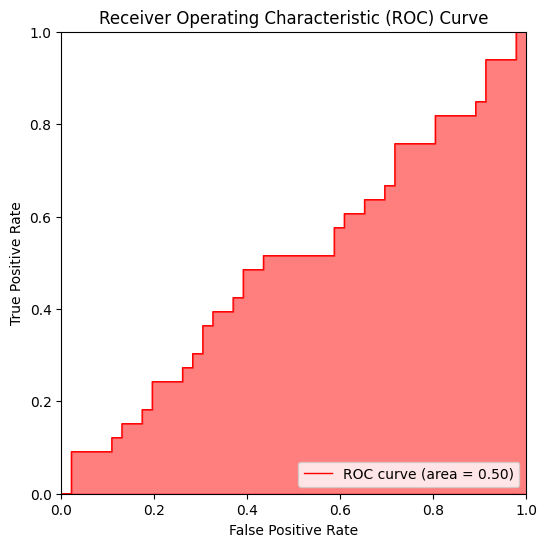

In [22]:
# Calculate the probablities of the test set
dot_plot_prod_pred = np.array(np.dot(X_test, weights_arr),dtype=np.float128)
#normalized_dot_plot_prod_pred = dot_plot_prod_pred - np.max(dot_plot_prod_pred)
y_plot_pred = 1 / (1 + np.exp(-dot_plot_prod_pred))

# Compute false positive and true positive for ROC curve

# get thresholds between 0 and 1
thresholds = np.linspace(0, 1, 100000)
tpr_values = []
fpr_values = []


for threshold in thresholds:
    # Compare bool arrays of y_pred and y_test
    y_pred = np.where(y_plot_pred >= threshold, 1, 0)
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))

    # Calculate true and false postive rate 
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # Add true and false postive rate to lists
    tpr_values.append(tpr)
    fpr_values.append(fpr)

# Convert lists to numpy arrays
fpr_array = np.array(fpr_values)
tpr_array = np.array(tpr_values)

# sort the indices in ascending order
sorted_indices = np.argsort(fpr_array)
fpr_sorted = fpr_array[sorted_indices]
tpr_sorted = tpr_array[sorted_indices]

# Use the trapizoidal rule to calculate area under the curve
auc_value = np.trapz(tpr_sorted, fpr_sorted)
print("Area under the curve (AUC): ", auc_value)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_array, tpr_array, color='red', lw=1, label='ROC curve (area = %0.2f)' % auc_value)
plt.fill_between(fpr_array, tpr_array, color='red', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Step 7: For Logistic model, what is the optimal decision threshold to maximize the f1 score

In [23]:
thresholds = np.linspace(0, 1, 1000)

# Setup result values for comparison and saving
best_threshold = None
best_f1 = -1

# Calculate true positive, false positive and false negative at each threshold
for threshold in thresholds:
    y_pred = np.where(y_plot_pred >= threshold, 1, 0)
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))

    # Calculate precsiosn and recall to find f1 value
    
    # account for 0 denominator to keep numpy happy and prevent nan
    if (tp + fp) == 0:
        precision == 0
    else:
        precision = tp / (tp + fp)
    
    # account for 0 denominator to keep numpy happy and prevent nan
    if (tp + fn) == 0:
        recall == 0
    else:
        recall = tp / (tp + fn)
    
    # account for 0 denominator to keep numpy happy and prevent nan
    if (precision + recall) == 0:
        f1 == 0
    else:
        f1 = 2 * ((precision * recall) / (precision + recall))

    # Compare f1 val against current best and update result values
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
                

print("Optimal Threshold:", best_threshold)
print("Best F1 Score:", best_f1)

Optimal Threshold: 0.44544544544544545
Best F1 Score: 0.5945945945945945


## PART B
#### Step 1: Split the data into 3 sets 

In [24]:
# Function to split data
from sklearn.model_selection import train_test_split

# Convert data frames too numpy matrices
Xnp = np.matrix(X.values,dtype=np.float64)
ynp = np.matrix(y.values,dtype=np.float64)

# First, split the data into 60 and 40 percent splits
X_train, X_temp, y_train, y_temp = train_test_split(Xnp, ynp, test_size=0.4)


# Normalize features
X_train = (X_train - X_train.mean()) / X_train.std()


# print(X_train.shape)
# print(X_temp.shape)

# Then, split the the 40 percent of the data in half
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

# Normalize Test features
X_test = (X_test - X_test.mean()) / X_test.std()

# Normalize validation features
X_val = (X_val - X_val.mean()) / X_val.std()

#### Step 2: Write a function train ridge to implement a Ridge model

In [25]:
# Import ridge model and auc score calculator function
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_auc_score

# Train ridge model function
def train_ridge(X_train = X_train, y_train = y_train, alpha_vals=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], n_bootstraps=1000, X_val = X_val, y_val = y_val):
    # Dictionary of lists, where each alpha val has a list of aucs
    aucs_ridge = {alpha: [] for alpha in alpha_vals}
    for strap in range(n_bootstraps):
        # Random sampling for in each bootstrap loop
        bootstrap_indices = np.asarray(np.random.choice(len(X_train), size=len(X_train), replace=True))
        
        # Re-order training data per randomized indices
        X_train_boot = X_train[bootstrap_indices]
        y_train_boot = y_train[bootstrap_indices]
        
        # For each alpha val train the ridge model
        for alpha in alpha_vals:
            # Setup model with lamda values
            model = Ridge(alpha=alpha)
            # Pass in training data as arrays as sk learn won't take numpy matrices
            model.fit(np.asarray(X_train_boot), np.asarray(y_train_boot))
            # make inference
            y_prob = model.predict(np.asarray(X_val))
            # Calculate area under curve from prediction and true value
            auc = roc_auc_score(np.asarray(y_val), y_prob)
            # Append the auc to the correct alpha list
            aucs_ridge[alpha].append(auc)
    # Calculate the mean for each alpha value
    mean_aucs_ridge = {alpha: np.mean(aucs) for alpha, aucs in aucs_ridge.items()}
    # Calculate the best alpha value by finding the highest average auc coefficient 
    best_alpha = max(mean_aucs_ridge, key=mean_aucs_ridge.get)
    
    return mean_aucs_ridge, best_alpha
mean_ridges, best_ridge_alpha_val = train_ridge(X_train=X_train,y_train=y_train)

print("mean aucs ridges: ", mean_ridges)
print("best alpha value:", best_ridge_alpha_val)

mean aucs ridges:  {0.001: 0.682024926686217, 0.01: 0.5952551319648094, 0.1: 0.5555454545454545, 1: 0.5164736070381232, 10.0: 0.5100982404692083, 100.0: 0.5106700879765396, 1000.0: 0.5089281524926687}
best alpha value: 0.001


By calculating the mean AUC score across the boot strapping per each alpha we can select the alpha value that gives us the best model. Auc is a good indicator for how effective a classifier model is because it represents how often a model is right when classifying. If a model has an auc of .5 it is as good as random chance, if it is more than .5 approaching 1 it is better than random chance and approaching a perfect classifier, if the model has an auc less than .5 then it is worse than random chance.

#### Step 3: Write a function train lasso to implement a Lasso model

In [26]:
# Import lasso model and auc score calculator function
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
# Import ignore warinning and convergence warning to prevent it
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Disable convergence warning for this function as some alpha vals might set it off
@ignore_warnings(category=ConvergenceWarning)
def train_lasso(X_train = X_train, y_train = y_train, alpha_vals=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3], n_bootstraps=1000, X_val = X_val, y_val = y_val):
    # Dictionary of lists, where each alpha val has a list of aucs
    aucs_lasso = {alpha: [] for alpha in alpha_vals}
    
    for strap in range(n_bootstraps):
        # Random sampling for in each bootstrap loop
        bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        
        # Re-order training data per randomized indices
        X_train_boot = X_train[bootstrap_indices]
        y_train_boot = y_train[bootstrap_indices]
        
        # For each alpha val train the lasso model
        for alpha in alpha_vals:
            # Setup model with lamda values
            model = Lasso(alpha=alpha)
            # Pass in training data as arrays as sk learn won't take numpy matrices
            model.fit(np.asarray(X_train_boot), np.asarray(y_train_boot))
            # make inference
            y_prob = model.predict(np.asarray(X_val))
            # Calculate area under curve from prediction and true value
            auc = roc_auc_score(np.asarray(y_val), y_prob)
            # Append the auc to the correct alpha list
            aucs_lasso[alpha].append(auc)
        # Calculate the mean for each alpha value
    mean_aucs_lasso = {alpha: np.mean(aucs) for alpha, aucs in aucs_lasso.items()}
    # Calculate the best alpha value by finding the highest average auc coefficient 
    best_alpha = max(mean_aucs_lasso, key=mean_aucs_lasso.get)
    
    return mean_aucs_lasso, best_alpha
mean_ridges, best_lasso_alpha_val = train_lasso(X_train=X_train,y_train=y_train)

print("mean aucs ridges: ", mean_ridges)
print("best alpha value:", best_lasso_alpha_val)

mean aucs ridges:  {0.001: 0.5407903225806451, 0.01: 0.5103013196480938, 0.1: 0.5053885630498535, 1: 0.5, 10.0: 0.5, 100.0: 0.5, 1000.0: 0.5}
best alpha value: 0.001


By calculating the mean AUC score across the boot strapping per each alpha we can select the alpha value that gives us the best model. Auc is a good indicator for how effective a classifier model is because it represents how often a model is right when classifying. If a model has an auc of .5 it is as good as random chance, if it is more than .5 approaching 1 it is better than random chance and approaching a perfect classifier, if the model has an auc less than .5 then it is worse than random chance.

#### Step 4: Write a function ridge coefficients that returns a tuple of trained ridge model with max iteriterations and optimal alpha as well as the model’s coefficients. Then do the same for Lasso

In [27]:
@ignore_warnings(category=ConvergenceWarning)
def ridge_coefficients(X_train = X_train, y_train = y_train, n_bootstraps=1000, alpha = best_ridge_alpha_val, X_val = X_val, y_val = y_val):
    
    # intialize return vals
    best_auc = -1
    best_alpha = None
    best_model = None
    max_iter = None

    for strap in range(n_bootstraps):
        # Random sampling for in each bootstrap loop
        bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        
        # Re-order training data per randomized indices
        X_train_boot = X_train[bootstrap_indices]
        y_train_boot = y_train[bootstrap_indices]

        # Setup model with lamda values
        model = Lasso(alpha=alpha)
        # Pass in training data as arrays as sk learn won't take numpy matrices
        model.fit(np.asarray(X_train_boot), np.asarray(y_train_boot))
        # make inference
        y_prob = model.predict(np.asarray(X_val))
        # Calculate area under curve from prediction and true value
        auc = roc_auc_score(np.asarray(y_val), y_prob)
        if auc > best_auc:
            best_auc = auc
            best_alpha = alpha
            best_model = model
        max_iter = strap
    return (best_model, best_alpha, best_model.coef_, max_iter)

@ignore_warnings(category=ConvergenceWarning)
def lasso_coefficients(X_train = X_train, y_train = y_train, n_bootstraps=1000, alpha = best_lasso_alpha_val, X_val = X_val, y_val = y_val):
    
    # intialize return vals
    best_auc = -1
    best_alpha = None
    best_model = None
    max_iter = None
    
    for strap in range(n_bootstraps):
        # Random sampling for in each bootstrap loop
        bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        
        # Re-order training data per randomized indices
        X_train_boot = X_train[bootstrap_indices]
        y_train_boot = y_train[bootstrap_indices]
        
        # Setup model with lamda values
        model = Lasso(alpha=alpha)
        # Pass in training data as arrays as sk learn won't take numpy matrices
        model.fit(np.asarray(X_train_boot), np.asarray(y_train_boot))
        # make inference
        y_prob = model.predict(np.asarray(X_val))
        # Calculate area under curve from prediction and true value
        auc = roc_auc_score(np.asarray(y_val), y_prob)
        if auc > best_auc:
            best_auc = auc
            best_alpha = alpha
            best_model = model
        max_iter = strap
    return (best_model, best_alpha, best_model.coef_, max_iter)


ridge_output = ridge_coefficients()
print("Ridge coefficients: ",ridge_output[2])

lasso_output = lasso_coefficients()
print("Lasso coefficients: ", lasso_output[2])

Ridge coefficients:  [-0.          0.         -0.          0.          0.63941071  0.
 -0.         -0.         -3.46513969 -0.         -0.          0.01389932
  0.89486378 -0.         -2.7604247   0.24746208  0.60715363 -0.07693653
 -0.         -0.          0.13878041]
Lasso coefficients:  [-0.          0.         -0.          0.         -0.         -0.4978891
 -0.         -0.         -1.10166092  0.         -0.         -0.11338965
  0.34423639 -0.         -0.          0.33456915 -0.20175297  0.08337209
  0.51861319  0.          0.06877384]


It makes sense that they would be different since ridge regression will always use all of the features to a certain degree so it will never have any coefficeints that are 0. Where as Lasso regularization will make coefficeints 0 if the alpha/lambda value is big enough. This difference is caused by the fact that ridge regression uses the L2 norm where as lasso regularization uses the L1 norm. So if there are predicators that are not correlative ridge regression will minimize them where as lasso regularization will 0 it out.

#### Step 5: Write a function ridge area under curve that returns area under curve measurements, and a function lasso area under curve that returns area under curve measurements

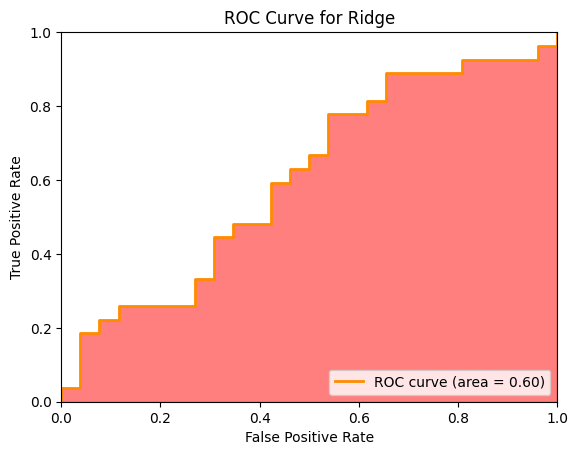

Area under the curve (AUC):  0.6039886039886039


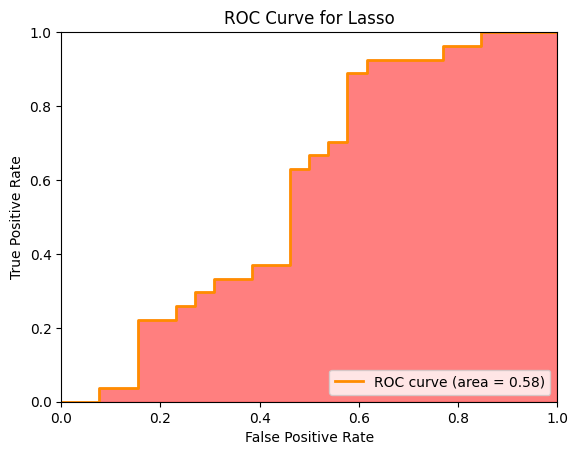

Area under the curve (AUC):  0.5769230769230769


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def ridge_auc(model=ridge_output[0] , X_val = np.asarray(X_test), y_val=np.asarray(y_test)):
    # Read in model from previous step and make inference
    y_prob = model.predict(X_val)
    # Calculate false positive rate and true positive rate from prediction and true value
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    # Calculate area under curve from false and true positive rates
    roc_auc = auc(fpr, tpr)
    # Plot area under curve with labels
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.fill_between(fpr, tpr, color='red', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Ridge')
    plt.legend(loc="lower right")
    plt.show()
    return auc(fpr, tpr)

def lasso_auc(model=lasso_output[0], X_val = np.asarray(X_test), y_val=np.asarray(y_test)):
    # Read in model from previous step and make inference
    y_prob = model.predict(X_val)
    # Calculate false positive rate and true positive rate from prediction and true value
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    # Calculate area under curve from false and true positive rates
    roc_auc = auc(fpr, tpr)
    # Plot area under curve with labels
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.fill_between(fpr, tpr, color='red', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Lasso')
    plt.legend(loc="lower right")
    plt.show()
    return auc(fpr, tpr)


print("Area under the curve (AUC): ",ridge_auc())
print("Area under the curve (AUC): ",lasso_auc())